# Exploratory Data Analysis Notebook

## Guideline:

### Step 1: Gather the Data [x]

- We've attained the training and testing data from Kaggle

### Step 2: Clean the Data [ ]

###### Checklist for Cleaning Data:

1. Remove any non alphanumeric characters [ ]
2. Tokenize question by separating into individual words [ ]
3. Remove irrelevant words, such as “@” twitter mentions or urls [ ]
4. Convert all characters to lowercase [ ]
5. Consider combining alternately spelled words to a single representation (e.g. “cool”/”kewl”/”cooool”) [ ]
6. Consider lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”) [ ]

### Step 3: Perform Some Type of Feature Engineering [ ]

- Add some potentially important meta-features to our training data
- Some potential features could include:

1. Number of total words
2. Number of numbers
3. Number of unique words
4. Number of capital letters
5. Number of stop words (Words that given us very little information i.e: "the", "is", "in", etc)
6. Length of question id
7. Average word length in question

### Step 4: Classification [ ]

- Here is where we split our train and test data up to create models for prediction and attain an accuracy
- Most of the time, we want to begin with more basic models and progress to more complex ones as required

More simple models could include:
<b>
- Logistic Regression
- Gaussian Naive Bayes
- Decision Tree Classifiers
</b>

More complex models could include:
<b>
- Some type of Recurrent Neural Network
- Light Gradient Boosting Machine (LGBM)
</b>


### Step 5: Inspection [ ]

- In this step, we try to explain and interpret our models that we've created from the previous step
- We could potentially set up a <b>confusion matrix</b> in an attempt to understand the various types of errors that our models are making

<hr>

## What is defined as an insincere question?

* Has a non-neutral tone
    * Has an exaggerated tone to underscore a point about a group of people
    * Is rhetorical and meant to imply a statement about a group of people
    
* Is disparaging or inflammatory
    * Suggests a discriminatory idea against a protected class of people, or seeks confirmation of a stereotype
    * Makes disparaging attacks/insults against a specific person or group of people
    * Based on an outlandish premise about a group of people
    * Disparages against a characteristic that is not fixable and not measurable

* Isn't grounded in reality
    * Based on false information, or contains absurd assumptions    

* Uses sexual content (incest, bestiality, pedophilia) for shock value, and not to seek genuine answers

<hr>

## Columns:

1. <b><i>qid:</i></b> This is a specifics questions unique identifier
2. <b><i>question_text:</i></b> This is the Quora question itself
3. <b><i>target:</i></b> This is our binary prediction variable (0 - sincere, 1 - insincere)

<hr>

## Model Evaluation Metric for this Dataset

<b><i>F1-Score</i></b>: Harmonic mean of recall and precision.


In [53]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
trainPath = "/Users/Bozinovski/Desktop/UNSW/21t2/COMP9417/Project/Data/train.csv" # Change path
testPath= "/Users/Bozinovski/Desktop/UNSW/21t2/COMP9417/Project/Data/test.csv"

df_train = pd.read_csv(trainPath) # Load in Training Data
df_test = pd.read_csv(testPath) # Load in Training Data

In [55]:
df_train.head() # Show first 5

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [56]:
# Split into x and y
X_train = df_train.drop(columns=["target"])
Y_train = df_train["target"]

In [57]:
# Take a look at the shapes of the test and training data
print(f"Train: {df_train.shape}")
print(f"Test: {df_test.shape}")

Train: (1306122, 3)
Test: (375806, 2)


In [58]:
# Check % of insincere
numOfSincere, numOfInsincere = df_train['target'].value_counts()

print(f"Approximately {round(numOfInsincere/(numOfSincere+numOfInsincere)*100, 2)}% of the training questions are insincere.")

Approximately 6.19% of the training questions are insincere.


We note from this that the <b>data set is highly imbalanced</b> so it makes sense to utilise the F1-score metric.

<AxesSubplot:xlabel='target', ylabel='count'>

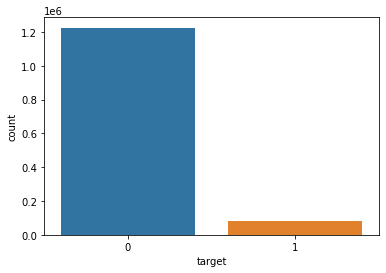

In [59]:
# Graph sincere vs insincere qs
sns.countplot(x = df_train['target'])

## Feature Engineering

We can perform some feature engineering by adding some meta-features to our data.
We can begin by adding the features mentioned in the Guideline

### 1. Number of Total Words

In [60]:
X_train['totalWords'] = [len(x.split()) for x in df['question_text'].tolist()]

In [61]:
X_train.head()

,qid,question_text,totalWords
0,00002165364db923c7e6,How did Quebec nationalists see their province...,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,15


### 2. Number of Numbers